# Linear models for regression

In [1]:
import sys
!{sys.executable} -m pip install numpy scipy matplotlib pandas mglearn

In [12]:
import mglearn
import matplotlib.pyplot as plt

w[0]: 0.393906  b: -0.031804


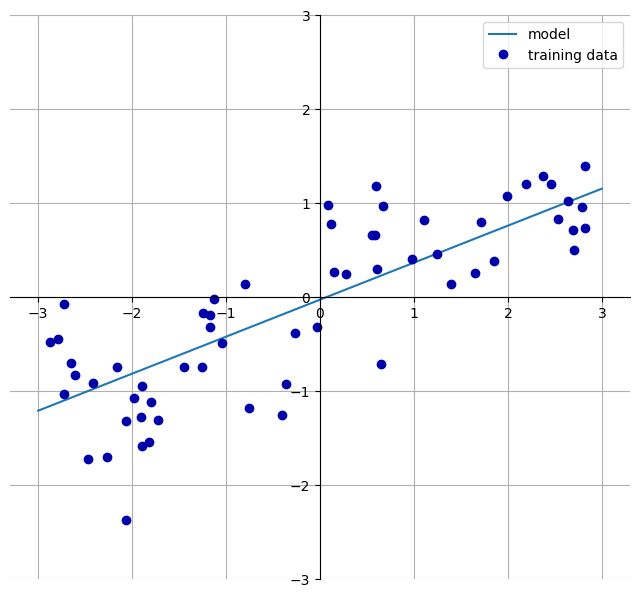

In [3]:
mglearn.plots.plot_linear_regression_wave()

There are many different models that can be used for regression. In this notebook, we will discuss linear models. Linear models are the simplest models for regression. They are called linear models because they are linear in the parameters. This means that the prediction is a linear function of the parameters.

The general form of a linear model is:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_p x_p + b
$$

where $y$ is the prediction, $w_0, w_1, \ldots, w_p$ are the parameters of the model, and $x_1, x_2, \ldots, x_p$ are the features, and $b$ is the bias. The goal of training a linear model is to find the values of the parameters $w_0, w_1, \ldots, w_p$ that minimize the error between the predictions of the model and the true values of the target variable.

There are many different linear models that can be used for regression. In this notebook, we will discuss some of the most common linear models, including:

- Linear regression
- Ridge regression
- Lasso regression

## Linear regression

Linear regression finds there parameters $w$ and $b$ that minize the mean squared error between the predictions of the model and the true values of the target variable. The mean squared error is defined as:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $y_i$ is the true value of the target variable, $\hat{y}_i$ is the prediction of the model, and $n$ is the number of samples in the dataset.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The lr.coef_ attribute of the LinearRegression object contains the coefficients of the linear model as a numpy array, and the lr.intercept_ attribute contains the intercept.

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


With lower dimensionality data, linear regression tends to underfit the model, but when higher dimensionality data is used, linear regression tends to overfit the model. This is because linear regression tries to fit a straight line to the data, which may not be the best fit for higher dimensionality data, but it converts into a powerful with higher dimensionality data.

In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


We can see clearly overfitting. One of the common alternatives to linear regression is ridge regression.

## Ridge regression

Also to minimize the mean squared error, ridge regression adds a penalty term to the loss function. It tries to have the coefficients as small as possible. This technique is called regularization, it means explicitly restricting the model to avoid overfitting. The particular kind used by ridge regression is called L2 regularization.

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As we can see, the training score is lower than linea regression, but it generalizes better given a better score in test data.

We have to tune the hyperparameter alpha, which controls the strength of the regularization. The higher the value of alpha, the more the coefficients are pushed towards zero. By default, the value of alpha is 1.0.

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Having a high alpha value, the model will be more robust to the noise in the data, but it will be less flexible. It is similar than linear regression.

In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


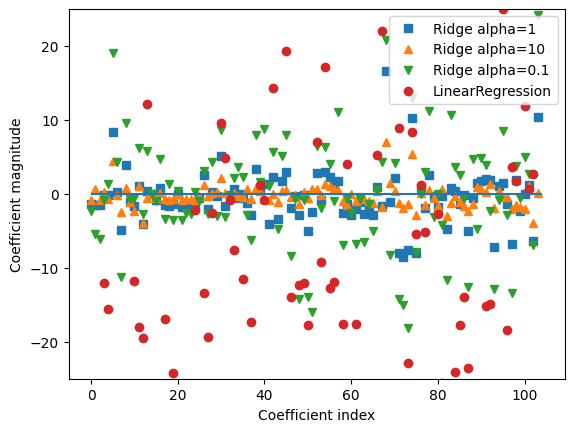

In [13]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Another way to undesrtand the influence of regularization is to fix a value of alpha and vary the amount of training data.

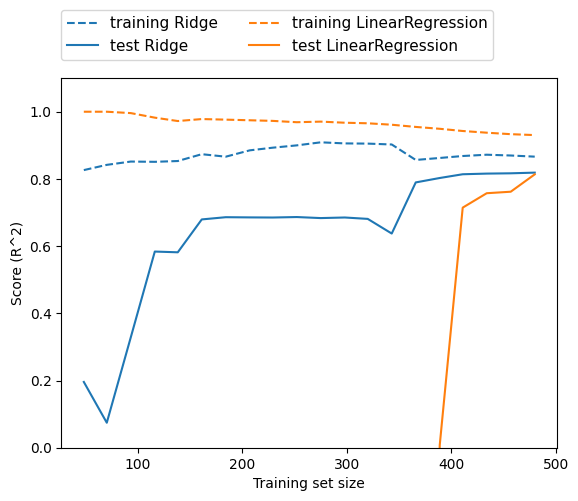

In [14]:
mglearn.plots.plot_ridge_n_samples()

This technique is called learning curve. We can conclude with the less data ridge regression is better than linear regression, because with less data, linear regression doesnt learn anything, but when we have more data, linear regression catches up with ridge regression.